**Here is the demo for the imitation model of the scikit-learn's LinearRegression**

**This notebook presents you single-variable linear regression**

In [1]:
from LinearReg import LinReg

In [2]:
help(LinReg)

Help on class LinReg in module LinearReg:

class LinReg(builtins.object)
 |  LinReg(lr=0.01, percent_diff=0.1)
 |  
 |  Linear regression class to predict coefficient and constant of single or multi-variable data.
 |  Parameters
 |  ----------
 |  lr : float, default=0.01
 |      Set the learning rate.
 |  percent_diff : float, default=0.1
 |      Set the difference percent before the epoch stops.
 |  Attributes
 |  ----------
 |  coefs : array of shape (n_features, ) or (n_targets, n_features)
 |      Return slope of the Linear Regression model object.
 |  const : float
 |      Retrun intercept of the Linear Regression model object.
 |  losses : array of shape (min(X, y),)
 |      Return loss progress each epoch of the model object.
 |  epochs : int
 |      Return how many epoch has applied when fit of the model object.
 |  Examples
 |  --------
 |  Input:
 |      import numpy as np
 |      from LinearReg import LinReg
 |      X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
 |      # y

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [6]:
## Comparation of built model and sklearn's LinearRegression model
# Create linear regression object
regr = linear_model.LinearRegression()
myReg = LinReg(lr=1.9, percent_diff=0.000001)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
myReg.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [7]:
my_pred = myReg.predict(diabetes_X_test)
my_pred.flatten()

array([225.86390645, 115.80427478, 163.26118018, 114.79455339,
       120.85288174, 158.21257322, 235.96112037, 121.86260313,
        99.64873252, 123.88204591, 204.65975723,  96.61956834,
       154.17368766, 130.95009565,  83.49319025, 171.33895131,
       138.01814539, 138.01814539, 189.51393636,  84.50291165])

In [8]:
# The coefficients
print('Coefficients: ', regr.coef_)
print('Built Module Coefficients: ', myReg.coefs)

Coefficients:  [938.23786125]
Built Module Coefficients:  [[936.82508848]]


In [9]:
#The intercept
print('Intercept: ', regr.intercept_)
print('Built Module Intercept: ', myReg.const)

Intercept:  152.91886182616167
Built Module Intercept:  152.91953144999638


In [10]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Built Module Mean squared error: %.2f'
      % myReg.rmse(diabetes_y_test, my_pred.flatten(), unroot=True))

Mean squared error: 2548.07
Built Module Mean squared error: 2549.68


In [11]:
# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
print('Built Module Mean absolute error: %.2f'
      % myReg.mae(diabetes_y_test, my_pred.flatten()))

Mean absolute error: 41.23
Built Module Mean absolute error: 41.26


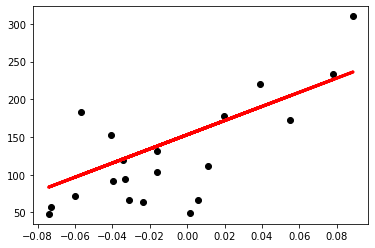

In [12]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='r', linewidth=3)

plt.show()

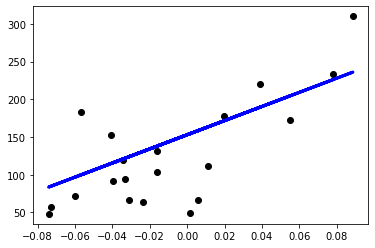

In [13]:
# Built module plot
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, my_pred, color='b', linewidth=3)

plt.show()

Text(0, 0.5, 'Cost Value')

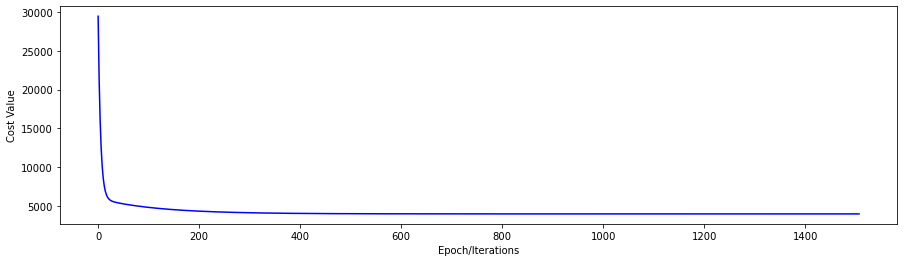

In [14]:
fig = plt.figure(figsize=(15,4))
plt.plot([i for i in range(len(myReg.losses))], myReg.losses, 'b-')
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost Value')

In [15]:
# Print epochs/iteration has done
myReg.epochs

1507